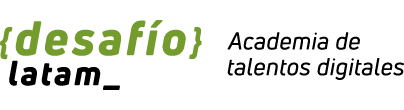

#<center><font color = 'green'>Solución Desafío - Predicción de renuncia de clientes</color></center>

##Carga de librerías y datos - Análisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, auc, roc_curve

In [2]:
df = pd.read_csv('Customer Churn.csv')
print(df.shape)
df.sample(5)

(3150, 14)


Call  Failure  Complains  Subscription  Length  Charge  Amount  \
2141              5          0                    28               0   
2930             10          0                    40               3   
2026              4          0                    33               0   
1219              0          0                    39               0   
1450              1          0                    33               0   

      Seconds of Use  Frequency of use  Frequency of SMS  \
2141            1130                16                28   
2930            7090               109                29   
2026            2685                35                 2   
1219            7283               123               387   
1450            3885                57                 0   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
2141                        5          4            1       2   45   
2930                       25          5            1       1   55   
2026                       14          2            1       2   25   
1219                       45          2            1       1   25   
1450                       10          2            1       1   25   

      Customer Value  Churn  
2141          98.650      0  
2930         151.485      0  
2026         131.400      1  
1219        2074.770      0  
1450         177.390      0

In [3]:
df.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers    Age Group  Tariff Plan       Status  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     2.826032     1.077778     1.248254   
std                  17.217337     0.892555     0.267864     0.432069   
min                   0.000000     1.000000     1.000000     1.000000   
25%                  10.000000     2.000000     1.000000     1.000000   
50%                  21.000000     3.000000     1.000000     1.000000   
75%                  34.000000     3.000000     1.000000     1.000000   
max                  97.000000     5.000000     2.000000     2.000000   

               Age  Customer Value        Churn  
count  3150.000000     3150.000000  3150.000000  
mean     30.998413      470.972916     0.157143  
std       8.831095      517.015433     0.363993  
min      15.000000        0.000000     0.000000  
25%      25.000000      113.801250     0.000000  
50%      30.000000      228.480000     0.000000  
75%      30.000000      788.388750     0.000000  
max      55.000000     2165.280000     1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

###Análisis de Subscriptin Length

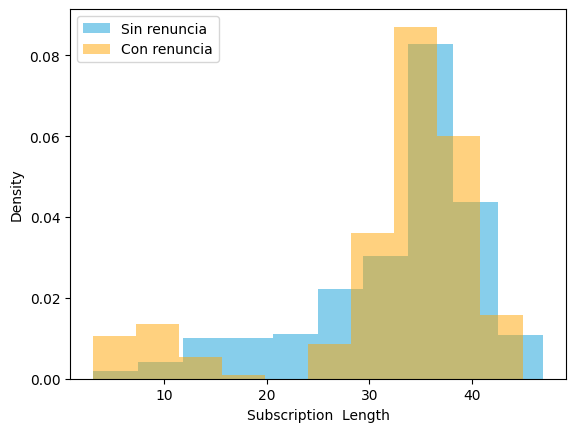

In [4]:
plt.hist(df[df['Churn']==0]['Subscription  Length'], density=True, color='skyblue', label='Sin renuncia')
plt.hist(df[df['Churn']==1]['Subscription  Length'], density=True, color='orange', alpha=.5, label='Con renuncia')
plt.xlabel('Subscription  Length')
plt.ylabel('Density')
plt.legend();

###Normalización y balanceo

In [5]:
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [6]:
df['Churn'].value_counts()

0    2655
1     495
Name: Churn, dtype: int64

In [7]:
smote = SMOTE(random_state=23)
X_resampled, y_resampled = smote.fit_resample(X_ss, y)

In [8]:
y_resampled.value_counts()

0    2655
1    2655
Name: Churn, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.33, random_state=23)

##Aplicación de Random Forest

In [10]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

yhat = rf_model.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       920
           1       0.95      0.99      0.97       833

    accuracy                           0.97      1753
   macro avg       0.97      0.97      0.97      1753
weighted avg       0.97      0.97      0.97      1753



In [11]:
df_importance = pd.DataFrame({
    'attribute': X.columns,
    'importance': rf_model.feature_importances_
})

top = 7
df_top = df_importance.sort_values(by='importance', ascending=False).head(top)

attribute_top = df_top['attribute'].to_list()
df_top

attribute  importance
10                   Status    0.191640
1                 Complains    0.114155
12           Customer Value    0.113664
5          Frequency of use    0.110735
2      Subscription  Length    0.105262
4            Seconds of Use    0.103466
7   Distinct Called Numbers    0.070921

##Implementación de la red neuronal

In [12]:
idx_attribute_top = []
for c in attribute_top:
    idx = np.argwhere(X.columns==c)[0,0]
    idx_attribute_top.append(idx)

X_train2 = X_train[:,idx_attribute_top]
X_test2 = X_test[:,idx_attribute_top]

In [13]:
ann_model = Sequential()

ann_model.add(keras.Input(shape=(X_train2.shape[1],)))
ann_model.add(
    Dense(
        units=20,
        activation='relu',
        use_bias=True
    )
)

ann_model.add(
    Dense(
        units=1,
        activation='sigmoid',
        use_bias=True
    )
)

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
ann_model.compile(optimizer=SGD(learning_rate=0.005), loss='binary_crossentropy')
ann_model.fit(X_train2, y_train, verbose=0, epochs=150)

In [15]:
yhat = ann_model.predict(X_test2)
yhat = np.where(yhat < 0.5, 0, 1)

print(classification_report(y_test, yhat))

55/55 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       920
           1       0.82      0.92      0.87       833

    accuracy                           0.87      1753
   macro avg       0.87      0.87      0.87      1753
weighted avg       0.87      0.87      0.87      1753



55/55 [==============================] - 0s 1ms/step


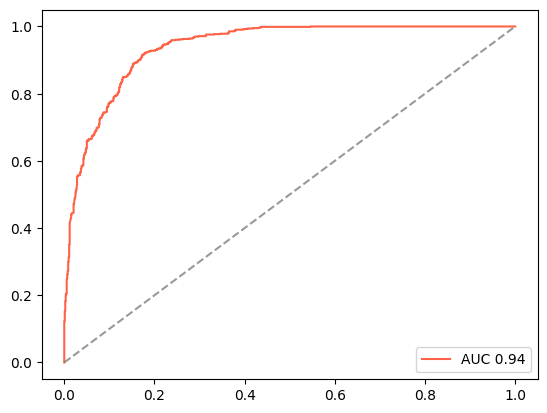

In [16]:
yhat = ann_model.predict(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, yhat)

plt.plot(fpr, tpr, ls='-', color='tomato', label=f'AUC {np.round(auc(fpr, tpr), 2)}')
plt.plot([0, 1], [0, 1], ls='--', color='gray', alpha=.8)
plt.legend(loc='lower right');